### Prophrt Model

##### Prophet model developed by Facebook for time series forecasting. Prophet is an open-source forecasting tool designed to handle time series data with daily observations that display patterns on different time scales.
Formula:- 
y(t) = g(t) + s(t) + h(t) + ϵt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx" )
df

TYPE       Date START TIME  END TIME  USAGE UNITS  COST  \
0      Electric usage 2016-10-22   00:00:00  00:14:00   0.01   kWh  0.00   
1      Electric usage 2016-10-22   00:15:00  00:29:00   0.01   kWh  0.00   
2      Electric usage 2016-10-22   00:30:00  00:44:00   0.01   kWh  0.00   
3      Electric usage 2016-10-22   00:45:00  00:59:00   0.01   kWh  0.00   
4      Electric usage 2016-10-22   01:00:00  01:14:00   0.01   kWh  0.00   
...               ...        ...        ...       ...    ...   ...   ...   
70363  Electric usage 2018-10-24   22:45:00  22:59:00   0.02   kWh  0.00   
70364  Electric usage 2018-10-24   23:00:00  23:14:00   0.03   kWh  0.01   
70365  Electric usage 2018-10-24   23:15:00  23:29:00   0.03   kWh  0.01   
70366  Electric usage 2018-10-24   23:30:00  23:44:00   0.03   kWh  0.01   
70367  Electric usage 2018-10-24   23:45:00  23:59:00   0.03   kWh  0.01   

       NOTES  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
70363    NaN  
70364    NaN  
70365    NaN  
70366    NaN  
70367    NaN  

[70368 rows x 8 columns]

In [3]:
df['Date']

0       2016-10-22
1       2016-10-22
2       2016-10-22
3       2016-10-22
4       2016-10-22
           ...    
70363   2018-10-24
70364   2018-10-24
70365   2018-10-24
70366   2018-10-24
70367   2018-10-24
Name: Date, Length: 70368, dtype: datetime64[ns]

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
#df = df.rename(columns={"DATE": "ds", "USAGE": "y"})
df


TYPE       Date START TIME  END TIME  USAGE UNITS  COST  \
0      Electric usage 2016-10-22   00:00:00  00:14:00   0.01   kWh  0.00   
1      Electric usage 2016-10-22   00:15:00  00:29:00   0.01   kWh  0.00   
2      Electric usage 2016-10-22   00:30:00  00:44:00   0.01   kWh  0.00   
3      Electric usage 2016-10-22   00:45:00  00:59:00   0.01   kWh  0.00   
4      Electric usage 2016-10-22   01:00:00  01:14:00   0.01   kWh  0.00   
...               ...        ...        ...       ...    ...   ...   ...   
70363  Electric usage 2018-10-24   22:45:00  22:59:00   0.02   kWh  0.00   
70364  Electric usage 2018-10-24   23:00:00  23:14:00   0.03   kWh  0.01   
70365  Electric usage 2018-10-24   23:15:00  23:29:00   0.03   kWh  0.01   
70366  Electric usage 2018-10-24   23:30:00  23:44:00   0.03   kWh  0.01   
70367  Electric usage 2018-10-24   23:45:00  23:59:00   0.03   kWh  0.01   

       NOTES  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
70363    NaN  
70364    NaN  
70365    NaN  
70366    NaN  
70367    NaN  

[70368 rows x 8 columns]

In [5]:
unique_types = df['TYPE'].unique()
unique_types

array(['Electric usage'], dtype=object)

In [6]:
tarin_df = df.groupby("Date")["USAGE"].sum().reset_index()
tarin_df

Date  USAGE
0   2016-10-22   4.52
1   2016-10-23  23.32
2   2016-10-24   7.16
3   2016-10-25   8.68
4   2016-10-26   5.04
..         ...    ...
728 2018-10-20   8.00
729 2018-10-21   1.12
730 2018-10-22   0.64
731 2018-10-23   1.20
732 2018-10-24   1.92

[733 rows x 2 columns]

In [7]:
excel_file_path = "train_df.xlsx"
tarin_df.to_excel(excel_file_path)
print("Predicted data saved to:", excel_file_path)

Predicted data saved to: train_df.xlsx


In [8]:
train_df = tarin_df.rename(columns={"Date": "ds", "USAGE": "y"})
train_df

ds      y
0   2016-10-22   4.52
1   2016-10-23  23.32
2   2016-10-24   7.16
3   2016-10-25   8.68
4   2016-10-26   5.04
..         ...    ...
728 2018-10-20   8.00
729 2018-10-21   1.12
730 2018-10-22   0.64
731 2018-10-23   1.20
732 2018-10-24   1.92

[733 rows x 2 columns]

In [9]:
model  = Prophet(changepoint_prior_scale=0.001,seasonality_mode='additive',seasonality_prior_scale=0.01)
model.fit(train_df)

19:31:49 - cmdstanpy - INFO - Chain [1] start processing
19:31:49 - cmdstanpy - INFO - Chain [1] done processing
19:31:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:31:50 - cmdstanpy - INFO - Chain [1] start processing
19:31:50 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=30)

In [11]:
forecast = model.predict(future)

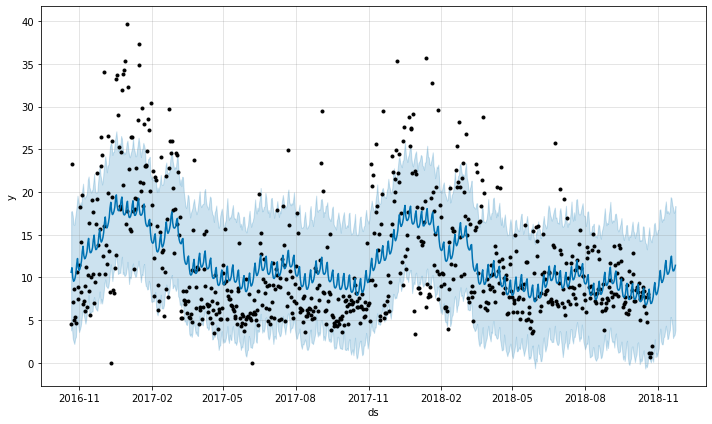

In [12]:
fig = model.plot(forecast)
plt.show()

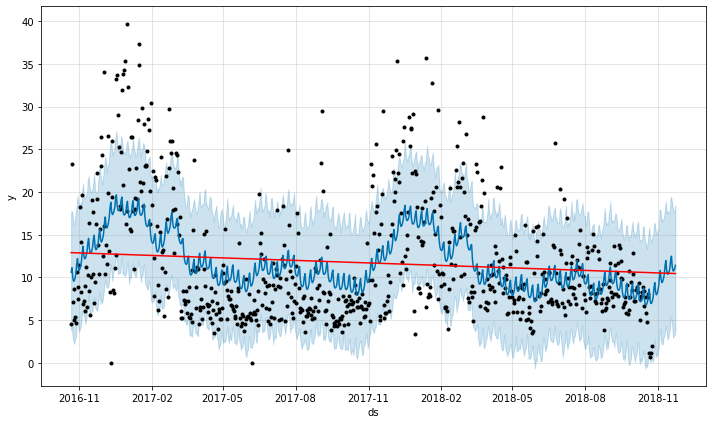

In [13]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

Forecasting models often assume **stationarity** for accurate predictions. **Non-stationary** data may exhibit trends or **seasonality that can mislead models**, resulting in **unreliable forecasts**.
stationary time series exhibits constant mean, variance, and autocorrelation, regardless of the time at which observations are made.


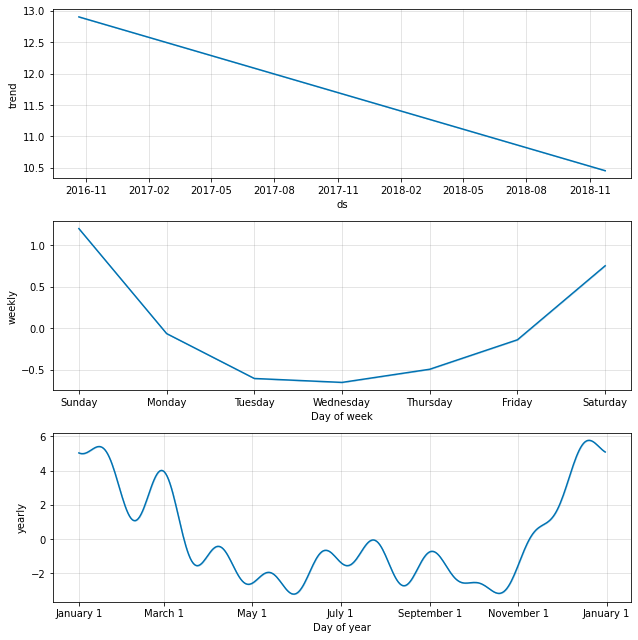

In [14]:
model.plot_components(forecast);


In [15]:
# Display the forecast for the specified future dates
forcast_df=print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper',]])

            ds       yhat  yhat_lower  yhat_upper
0   2016-10-22  10.605151    3.790904   17.721469
1   2016-10-23  11.133577    4.155268   17.769367
2   2016-10-24   9.967413    2.860308   17.224356
3   2016-10-25   9.546601    2.504083   16.198975
4   2016-10-26   9.639797    2.206927   16.174758
..         ...        ...         ...         ...
758 2018-11-19  11.264738    4.428487   18.528867
759 2018-11-20  10.769167    2.919594   18.155492
760 2018-11-21  10.773010    3.145790   17.556870
761 2018-11-22  10.990746    3.275309   17.768824
762 2018-11-23  11.415855    3.845438   18.366818

[763 rows x 4 columns]


In [16]:
print(forecast[['ds', ]])

            ds
0   2016-10-22
1   2016-10-23
2   2016-10-24
3   2016-10-25
4   2016-10-26
..         ...
758 2018-11-19
759 2018-11-20
760 2018-11-21
761 2018-11-22
762 2018-11-23

[763 rows x 1 columns]


In [17]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] > 0) & (forecast['yhat_upper'] > 0)]

# Display the filtered DataFrame
positive_interval_rows

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2016-10-22  12.900103    3.790904   17.721469    12.900103    12.900103   
1   2016-10-23  12.896894    4.155268   17.769367    12.896894    12.896894   
2   2016-10-24  12.893686    2.860308   17.224356    12.893686    12.893686   
3   2016-10-25  12.890477    2.504083   16.198975    12.890477    12.890477   
4   2016-10-26  12.887269    2.206927   16.174758    12.887269    12.887269   
..         ...        ...         ...         ...          ...          ...   
758 2018-11-19  10.468066    4.428487   18.528867    10.468066    10.468066   
759 2018-11-20  10.464858    2.919594   18.155492    10.464858    10.464858   
760 2018-11-21  10.461649    3.145790   17.556870    10.461649    10.461649   
761 2018-11-22  10.458441    3.275309   17.768824    10.458441    10.458441   
762 2018-11-23  10.455232    3.845438   18.366818    10.455232    10.455232   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         -2.294951             -2.294951             -2.294951  0.754457   
1         -1.763317             -1.763317             -1.763317  1.202934   
2         -2.926273             -2.926273             -2.926273 -0.064113   
3         -3.343877             -3.343877             -3.343877 -0.606168   
4         -3.247472             -3.247472             -3.247472 -0.653497   
..              ...                   ...                   ...       ...   
758        0.796672              0.796672              0.796672 -0.064113   
759        0.304309              0.304309              0.304309 -0.606168   
760        0.311361              0.311361              0.311361 -0.653497   
761        0.532305              0.532305              0.532305 -0.494645   
762        0.960622              0.960622              0.960622 -0.138968   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0        0.754457      0.754457 -3.049409     -3.049409     -3.049409   
1        1.202934      1.202934 -2.966251     -2.966251     -2.966251   
2       -0.064113     -0.064113 -2.862159     -2.862159     -2.862159   
3       -0.606168     -0.606168 -2.737709     -2.737709     -2.737709   
4       -0.653497     -0.653497 -2.593975     -2.593975     -2.593975   
..            ...           ...       ...           ...           ...   
758     -0.064113     -0.064113  0.860785      0.860785      0.860785   
759     -0.606168     -0.606168  0.910477      0.910477      0.910477   
760     -0.653497     -0.653497  0.964858      0.964858      0.964858   
761     -0.494645     -0.494645  1.026950      1.026950      1.026950   
762     -0.138968     -0.138968  1.099590      1.099590      1.099590   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
758                   0.0                         0.0   
759                   0.0                         0.0   
760                   0.0                         0.0   
761                   0.0                         0.0   
762                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
0                           0.0  10.605151  
1                           0.0  11.133577  
2                           0.0   9.967413  
3                           0.0   9.546601  
4                           0.0   9.639797  
..                          ...        ...  
758                         0.0  11.264738  
759                         0.0  10.769167  
760                         0.0  10.773010  
761                         0.0  10.990746  
762                         0.0  11.415855  

[755 rows x 19 columns]

In [18]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] < 0) & (forecast['yhat_upper'] < 0)]


positive_interval_rows

Empty DataFrame
Columns: [ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat]
Index: []

In [19]:
from sklearn.metrics import mean_squared_error
# Extract actual values for the forecast period 
actual_values = df[df['Date'] >= forecast['ds'].min()]['USAGE'].values

# Ensure lengths are consistent
if len(actual_values) >= len(forecast):    
    actual_values = actual_values[:len(forecast)]    
    mse = mean_squared_error(actual_values, forecast['yhat'].values)
    rmse = np.sqrt(mse)
    #print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
else:
    print("Lengths of actual_values and forecast are inconsistent.")

Root Mean Squared Error (RMSE): 11.95


In [20]:
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
df_cv = cross_validation(model, initial='365 days', period='365 days', horizon = '30 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/1 [00:00<?, ?it/s]

19:34:53 - cmdstanpy - INFO - Chain [1] start processing
19:34:53 - cmdstanpy - INFO - Chain [1] done processing
19:34:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:34:53 - cmdstanpy - INFO - Chain [1] start processing
19:34:54 - cmdstanpy - INFO - Chain [1] done processing


When using Prophet, a common approach is to perform time series cross-validation, where the dataset is divided into multiple contiguous folds, each representing a sequence of time periods. The model is trained on past data and evaluated on the subsequent fold. This process is repeated for each fold, and the performance metrics are aggregated to assess the overall model performance.


Model Generalization:*Cross-validation allows you to assess how well the model generalizes to unseen future data.* 



Hyperparameter Tuning:*Cross-validation is crucial when tuning hyperparameters of the model, such as seasonality components or other parameters specific to the Prophet model.*

In [21]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

horizon        mse      rmse       mae      mape     mdape     smape  \
0   3 days   4.469335  2.114080  1.625609  0.180223  0.183316  0.195839   
1   4 days   1.506430  1.227367  1.061495  0.135377  0.183316  0.136892   
2   5 days   1.091397  1.044700  0.742871  0.081086  0.035842  0.087663   
3   6 days   1.606677  1.267547  1.075590  0.109797  0.121976  0.118797   
4   7 days   8.633700  2.938316  2.123717  0.175312  0.121976  0.208214   
5   8 days   8.631569  2.937953  2.117203  0.175541  0.121976  0.208438   
6   9 days   8.099467  2.845956  1.745753  0.142166  0.021851  0.172344   
7  10 days   0.333162  0.577202  0.429278  0.052292  0.021851  0.054432   
8  11 days   0.489591  0.699708  0.612041  0.072336  0.081262  0.075697   
9  12 days   0.481338  0.693785  0.566788  0.065928  0.081262  0.069369   
10 13 days   0.528114  0.726714  0.589952  0.069807  0.081262  0.068484   
11 14 days   0.894092  0.945564  0.776351  0.087638  0.125533  0.088413   
12 15 days   3.207732  1.791014  1.646802  0.263823  0.134754  0.227440   
13 16 days   2.846963  1.687294  1.329461  0.226097  0.134754  0.192160   
14 17 days   2.328971  1.526097  0.973065  0.189306  0.024380  0.152224   
15 18 days   0.039523  0.198803  0.184979  0.023131  0.024380  0.023387   
16 19 days   0.037834  0.194510  0.173824  0.021236  0.024380  0.021509   
17 20 days   0.346484  0.588629  0.436871  0.052048  0.032658  0.050072   
18 21 days   1.028862  1.014328  0.832105  0.114259  0.116816  0.104880   
19 22 days   1.034185  1.016949  0.858936  0.118057  0.116816  0.108741   
20 23 days   1.649753  1.284427  1.090577  0.174140  0.219294  0.155118   
21 24 days   3.785258  1.945574  1.578562  0.305528  0.285064  0.245730   
22 25 days   3.801566  1.949760  1.619238  0.310739  0.285064  0.250700   
23 26 days   3.160932  1.777901  1.374565  0.254975  0.117769  0.204606   
24 27 days  23.544234  4.852240  3.183629  2.534791  0.117769  0.573736   
25 28 days  42.753677  6.538630  5.628415  6.479722  7.452907  1.133215   
26 29 days  56.907215  7.543687  7.509010  8.269338  7.452907  1.584713   
27 30 days  45.331468  6.732865  6.697193  6.811391  5.486617  1.463248   

    coverage  
0   1.000000  
1   1.000000  
2   1.000000  
3   1.000000  
4   1.000000  
5   1.000000  
6   1.000000  
7   1.000000  
8   1.000000  
9   1.000000  
10  1.000000  
11  1.000000  
12  1.000000  
13  1.000000  
14  1.000000  
15  1.000000  
16  1.000000  
17  1.000000  
18  1.000000  
19  1.000000  
20  1.000000  
21  1.000000  
22  1.000000  
23  1.000000  
24  0.666667  
25  0.333333  
26  0.333333  
27  0.666667

In [26]:
# # Calculate MAPE manually
# df_cv['mape'] = np.abs((df_cv['y'] - df_cv['yhat']) / df_cv['y']) * 100
# mape_mean = df_cv['mape'].mean()

# print(f'Mean Absolute Percentage Error (MAPE): {mape_mean:.2f}%')

In [23]:
import itertools
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross-validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_df)  # Fit model with given params
    df_cv = cross_validation(m, initial='365 days', period='30 days', horizon='30 days', parallel='processes')  # Use m instead of model
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

best_params = dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])


19:34:57 - cmdstanpy - INFO - Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing
19:34:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:34:57 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:08 - cmdstanpy - INFO - Chain [1] done processing
19:35:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:09 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:35:19 - cmdstanpy - INFO 

In [24]:
best_params

{'changepoint_prior_scale': 0.001,
 'seasonality_prior_scale': 0.01,
 'rmse': 5.804300606572054}

# LSTM

**Long Short-Term Memory (LSTM)** networks are a type of recurrent neural network (RNN) that has proven to be effective in capturing long-term dependencies in sequences, making them well-suited for time series forecasting. LSTMs are designed to handle the vanishing gradient problem that traditional RNNs often face, enabling them to capture information over extended time lags.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df

TYPE       Date START TIME  END TIME  USAGE UNITS  COST  \
0      Electric usage 2016-10-22   00:00:00  00:14:00   0.01   kWh  0.00   
1      Electric usage 2016-10-22   00:15:00  00:29:00   0.01   kWh  0.00   
2      Electric usage 2016-10-22   00:30:00  00:44:00   0.01   kWh  0.00   
3      Electric usage 2016-10-22   00:45:00  00:59:00   0.01   kWh  0.00   
4      Electric usage 2016-10-22   01:00:00  01:14:00   0.01   kWh  0.00   
...               ...        ...        ...       ...    ...   ...   ...   
70363  Electric usage 2018-10-24   22:45:00  22:59:00   0.02   kWh  0.00   
70364  Electric usage 2018-10-24   23:00:00  23:14:00   0.03   kWh  0.01   
70365  Electric usage 2018-10-24   23:15:00  23:29:00   0.03   kWh  0.01   
70366  Electric usage 2018-10-24   23:30:00  23:44:00   0.03   kWh  0.01   
70367  Electric usage 2018-10-24   23:45:00  23:59:00   0.03   kWh  0.01   

       NOTES  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
70363    NaN  
70364    NaN  
70365    NaN  
70366    NaN  
70367    NaN  

[70368 rows x 8 columns]

In [30]:
df["Date"] = pd.to_datetime(df["Date"])

In [31]:
df["START TIME"] = pd.to_timedelta(df["START TIME"].astype(str))

In [32]:
df["Datetime"] = df["Date"] + df["START TIME"]

In [33]:
# Extract relevant features
data = df[["Datetime", "USAGE"]].set_index("Datetime")
data

USAGE
Datetime                  
2016-10-22 00:00:00   0.01
2016-10-22 00:15:00   0.01
2016-10-22 00:30:00   0.01
2016-10-22 00:45:00   0.01
2016-10-22 01:00:00   0.01
...                    ...
2018-10-24 22:45:00   0.02
2018-10-24 23:00:00   0.03
2018-10-24 23:15:00   0.03
2018-10-24 23:30:00   0.03
2018-10-24 23:45:00   0.03

[70368 rows x 1 columns]

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70368 entries, 2016-10-22 00:00:00 to 2018-10-24 23:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USAGE   70368 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [36]:
def create_sequences(data, seq_length):        
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append((seq, label))
    return np.array(sequences)


When training a recurrent neural network, especially for time series forecasting, the model needs input **sequences and corresponding target**.
The idea is to use a window of past data points (sequence) to predict the next data point (label). This allows the model to learn patterns and relationships in the time series data.

In [56]:
seq_length = 10
batch_size = 32
epochs = 50


In [57]:
sequences = create_sequences(data_scaled, seq_length)

C:\Users\Darshan\AppData\Local\Temp\ipykernel_10624\1587334098.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


In [58]:
X = np.array([seq for seq, _ in sequences])
y = np.array([label for _, label in sequences])

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [60]:
from tensorflow.keras.optimizers import Adam

In [63]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.009), loss='mse')

In [64]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping], shuffle=False)

Epoch 1/50
1759/1759 [==============================] - 9s 4ms/step - loss: 0.0027 - val_loss: 4.6710e-04
Epoch 2/50
1759/1759 [==============================] - 8s 5ms/step - loss: 0.0023 - val_loss: 4.6470e-04
Epoch 3/50
1759/1759 [==============================] - 8s 5ms/step - loss: 0.0021 - val_loss: 4.5546e-04
Epoch 4/50
1759/1759 [==============================] - 8s 4ms/step - loss: 0.0021 - val_loss: 4.5781e-04
Epoch 5/50
1759/1759 [==============================] - 8s 5ms/step - loss: 0.0022 - val_loss: 4.8158e-04
Epoch 6/50
1759/1759 [==============================] - 8s 5ms/step - loss: 0.0043 - val_loss: 5.1398e-04
Epoch 7/50
1759/1759 [==============================] - 8s 5ms/step - loss: 0.0022 - val_loss: 4.5333e-04
Epoch 8/50
1759/1759 [==============================] - 8s 4ms/step - loss: 0.0020 - val_loss: 4.5054e-04
Epoch 9/50
1759/1759 [==============================] - 8s 5ms/step - loss: 0.0020 - val_loss: 4.4959e-04
Epoch 10/50
1759/1759 [=======================

The **learning rate** is a critical hyperparameter. If it is too high, the optimization process may overshoot the minimum, and if it's too low, the model may converge too slowly. You can experiment with different learning rates to find an optimal value. Consider trying smaller or larger values and observing the effect on the training process.

**Early stopping** is a regularization technique used during the training of machine learning models, including neural networks. The goal of early stopping is to prevent overfitting by stopping the training process once the model's performance on a validation dataset starts to degrade. This helps avoid training for too many epochs, which may lead to the model memorizing noise in the training data.

In [65]:
# Make predictions for the next 30 days
last_sequence = data_scaled[-seq_length:]
next_predictions = []


In [66]:
for _ in range(30):
    next_pred = model.predict(np.array([last_sequence.reshape((seq_length, 1))]))
    next_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred)


1/1 [==============================] - 0s 17ms/step


In [67]:
# Inverse transform the predictions to the original scale
y_test_original = scaler.inverse_transform(np.array(next_predictions).reshape(-1, 1))
y_test_original

array([[0.03726615],
       [0.04447302],
       [0.05142398],
       [0.058075  ],
       [0.06441059],
       [0.07042244],
       [0.07610651],
       [0.0814624 ],
       [0.0864929 ],
       [0.09120361],
       [0.09560245],
       [0.09969936],
       [0.10342558],
       [0.1067706 ],
       [0.10989697],
       [0.11281329],
       [0.11552696],
       [0.11804877],
       [0.12038951],
       [0.12255972],
       [0.12456976],
       [0.12642963],
       [0.12814908],
       [0.12973735],
       [0.13120335],
       [0.13255557],
       [0.13380201],
       [0.13495028],
       [0.13600753],
       [0.13698049]], dtype=float32)

In [68]:
# Calculate RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(y_test_original, np.array(next_predictions).flatten()))
rmse

0.0615661677064323

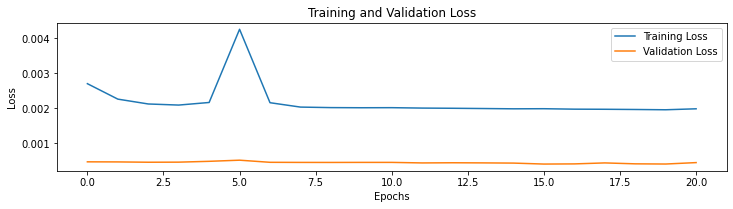

In [69]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Plot training and validation loss over epochs
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

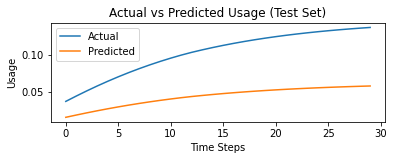

In [70]:
# Plot actual vs predicted usage for the test set
plt.subplot(2, 1, 2)
plt.plot(y_test_original, label='Actual')
plt.plot(np.array(next_predictions).flatten(), label='Predicted')  # Fix 'flatten()' here
plt.title('Actual vs Predicted Usage (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Usage')
plt.legend()


In [71]:
# Display the next 30 days predictions in column form
next_predictions_df = pd.DataFrame({'Date': pd.date_range(df['Date'].max() + pd.DateOffset(1), periods=30),
                                     'Predicted Usage': np.array(next_predictions).flatten()})
print(next_predictions_df)

# Display metrics
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

         Date  Predicted Usage
0  2018-10-25         0.015791
1  2018-10-26         0.018845
2  2018-10-27         0.021790
3  2018-10-28         0.024608
4  2018-10-29         0.027293
5  2018-10-30         0.029840
6  2018-10-31         0.032249
7  2018-11-01         0.034518
8  2018-11-02         0.036650
9  2018-11-03         0.038646
10 2018-11-04         0.040510
11 2018-11-05         0.042245
12 2018-11-06         0.043824
13 2018-11-07         0.045242
14 2018-11-08         0.046567
15 2018-11-09         0.047802
16 2018-11-10         0.048952
17 2018-11-11         0.050021
18 2018-11-12         0.051013
19 2018-11-13         0.051932
20 2018-11-14         0.052784
21 2018-11-15         0.053572
22 2018-11-16         0.054300
23 2018-11-17         0.054973
24 2018-11-18         0.055595
25 2018-11-19         0.056168
26 2018-11-20         0.056696
27 2018-11-21         0.057182
28 2018-11-22         0.057630
29 2018-11-23         0.058043
Root Mean Squared Error (RMSE): 0.06


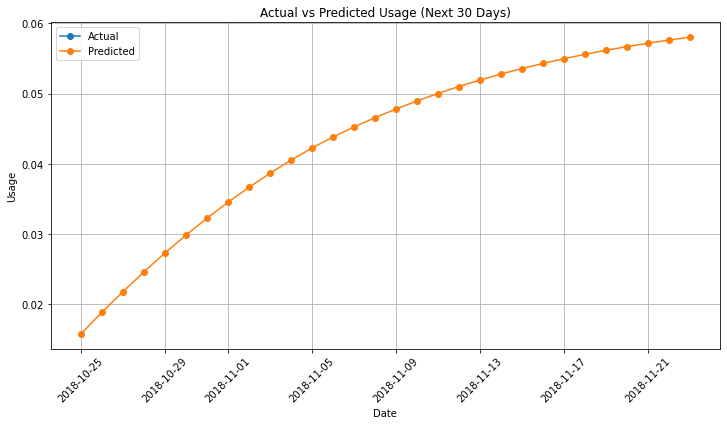

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for visualization
visualization_df = pd.DataFrame({'Date': pd.date_range(df['Date'].max() + pd.DateOffset(1), periods=30),
                                 'Actual': np.nan,  # Placeholder for actual values
                                 'Predicted': np.array(next_predictions).flatten()})

# Fill the actual values in the DataFrame
visualization_df.loc[visualization_df['Date'].isin(data.index[-30:]), 'Actual'] = y_test_original.flatten()

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot actual vs predicted usage for the test set
plt.plot(visualization_df['Date'], visualization_df['Actual'], label='Actual', marker='o')
plt.plot(visualization_df['Date'], visualization_df['Predicted'], label='Predicted', marker='o')

# Plot settings
plt.title('Actual vs Predicted Usage (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


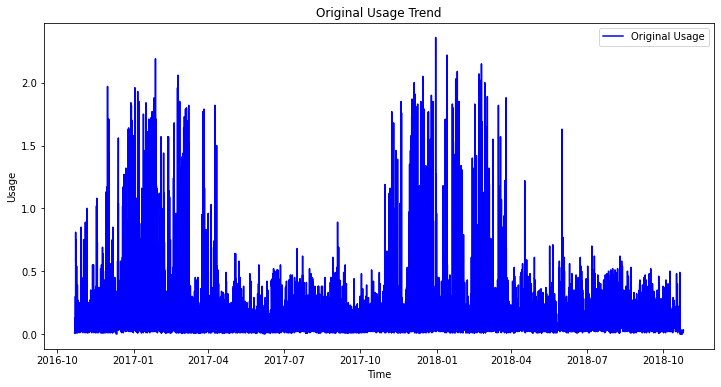

In [73]:
# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['USAGE'], label='Original Usage', color='blue')
plt.title('Original Usage Trend')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()
plt.show()


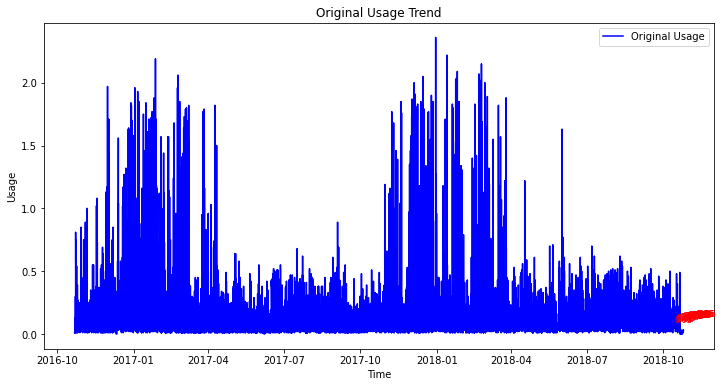

In [74]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['USAGE'], label='Original Usage', color='blue')
plt.title('Original Usage Trend')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()

# Annotate the graph with the predicted values for the next 30 days
for i, txt in enumerate(next_predictions_df['Predicted Usage']):
    plt.annotate(f'{txt:.2f}', (next_predictions_df['Date'].iloc[i], txt), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

plt.show()


### ARIMA & SARIMA

**AutoRegressive (AR):** Represents the relationship between the current observation and its previous observations (lags).

**Integrated (I):** Refers to differencing the series to make it stationary, i.e., removing trends.

**Moving Average (MA):** Captures the relationship between the current observation and a residual error from a moving average model.

**Model Order:**
ARIMA is defined by three parameters: p (order of AR), d (order of differencing), and q (order of MA).
ARIMA(p, d, q)

**Stationarity:**
It assumes that the input time series is stationary, or it can be transformed into a stationary series through differencing.



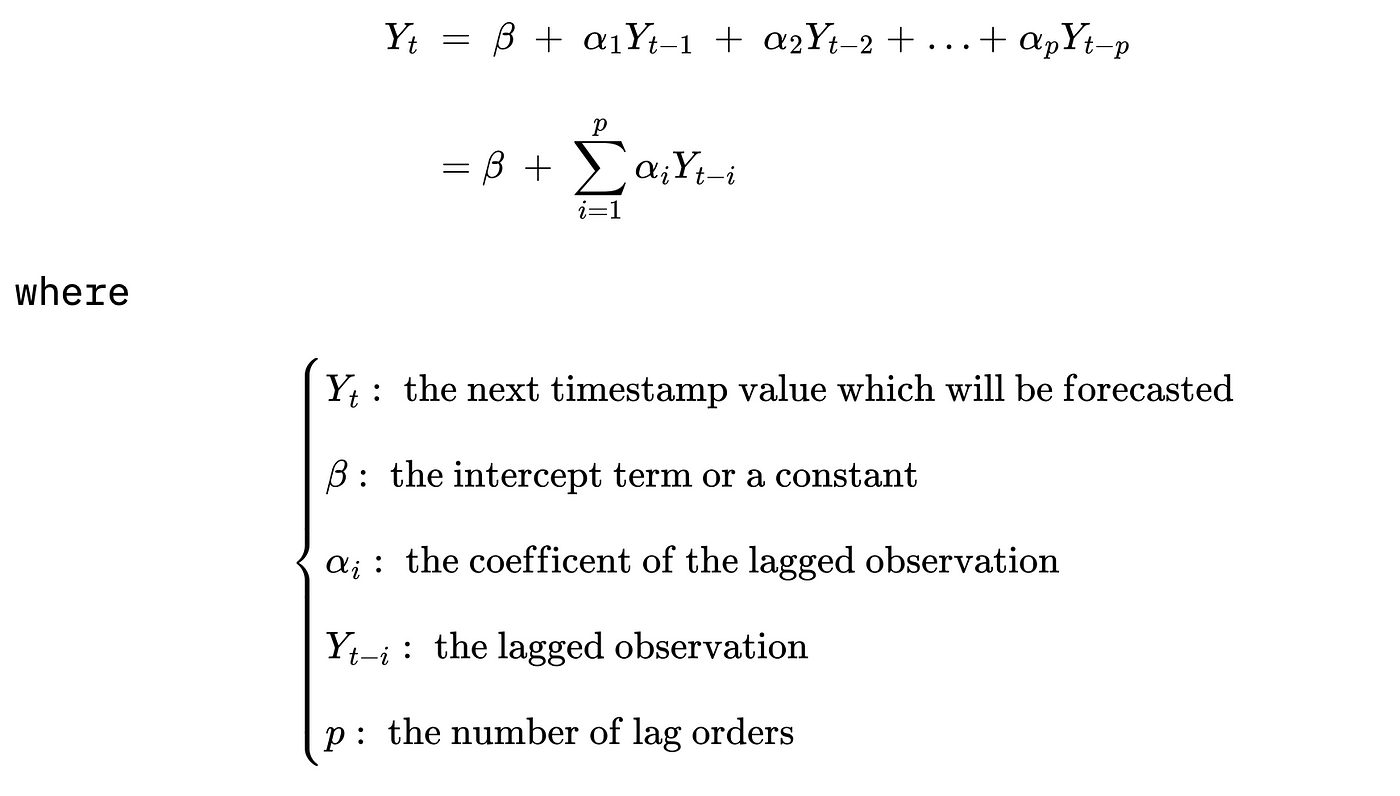

### Seasonal AutoRegressive Integrated Moving Average)

**Components**
SARIMA extends ARIMA by incorporating seasonal components.

It includes additional parameters for the seasonal component: P (seasonal order of AR), D (seasonal order of differencing), Q (seasonal order of MA), and m (number of time steps per season).

**Seasonality:**
SARIMA is effective when the time series exhibits seasonality, i.e., repeating patterns at regular intervals.

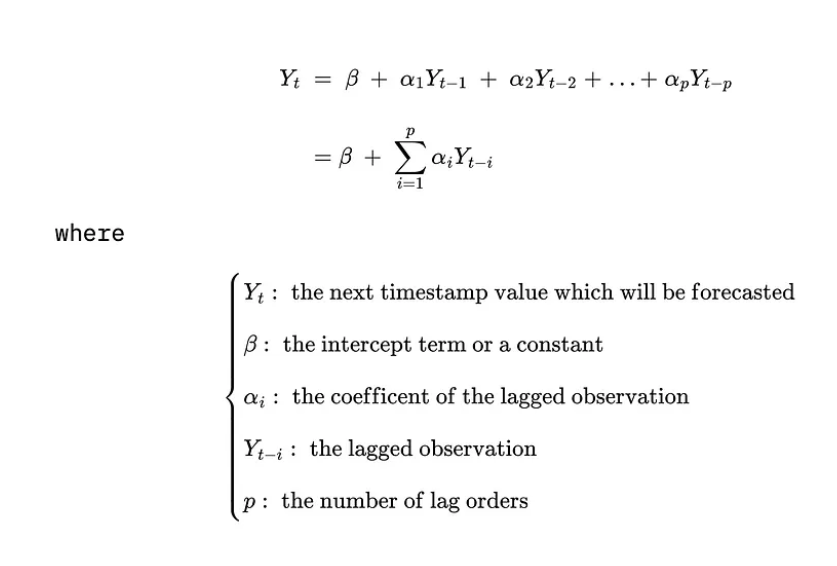

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [3]:
df = pd.read_excel(r"C:\Users\Darshan\OneDrive\Desktop\Darshan Resume\VOIS\Project 1 time series\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])


In [6]:
data = df[["Date", "USAGE"]].set_index("Date")

In [8]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [9]:
order_arima = (5, 1, 0)  
arima_model = sm.tsa.ARIMA(train, order=order_arima)
arima_fit = arima_model.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [10]:
order_sarima = (1, 1, 1, 12)  
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
arima_pred = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
sarima_pred = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [12]:
mae_arima = mean_absolute_error(test, arima_pred)
mse_arima = mean_squared_error(test, arima_pred)
rmse_arima = sqrt(mse_arima)

mae_sarima = mean_absolute_error(test, sarima_pred)
mse_sarima = mean_squared_error(test, sarima_pred)
rmse_sarima = sqrt(mse_sarima)

print(f'ARIMA Metrics:')
print(f'Mean Absolute Error (MAE): {mae_arima:.2f}')
print(f'Mean Squared Error (MSE): {mse_arima:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_arima:.2f}')

print('\nSARIMA Metrics:')
print(f'Mean Absolute Error (MAE): {mae_sarima:.2f}')
print(f'Mean Squared Error (MSE): {mse_sarima:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_sarima:.2f}')

ARIMA Metrics:
Mean Absolute Error (MAE): 2.48
Mean Squared Error (MSE): 12.96
Root Mean Squared Error (RMSE): 3.60

SARIMA Metrics:
Mean Absolute Error (MAE): 3.09
Mean Squared Error (MSE): 18.17
Root Mean Squared Error (RMSE): 4.26


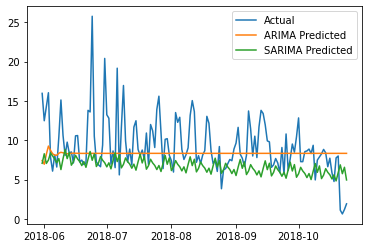

In [13]:
plt.plot(test, label='Actual')
plt.plot(arima_pred, label='ARIMA Predicted')
plt.plot(sarima_pred, label='SARIMA Predicted')
plt.legend()
plt.show()

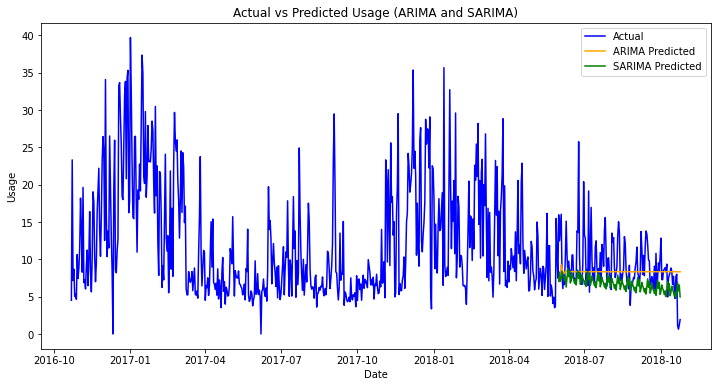

In [14]:
plt.figure(figsize=(12, 6))

# Plot the actual values
plt.plot(data.index, data['USAGE'], label='Actual', color='blue')

# Plot the ARIMA predicted values
plt.plot(test.index, arima_pred, label='ARIMA Predicted', color='orange')

# Plot the SARIMA predicted values
plt.plot(test.index, sarima_pred, label='SARIMA Predicted', color='green')

plt.title('Actual vs Predicted Usage (ARIMA and SARIMA)')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.legend()
plt.show()


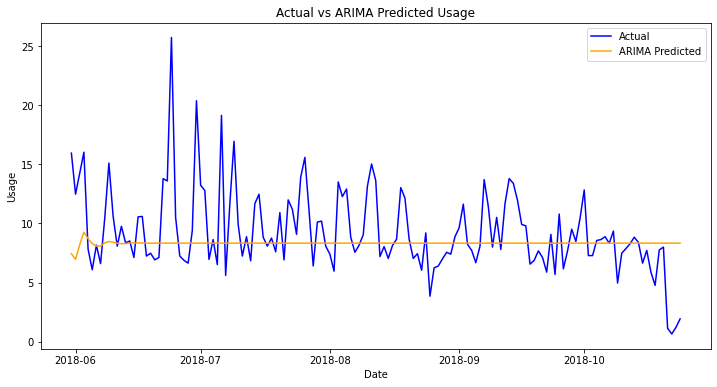

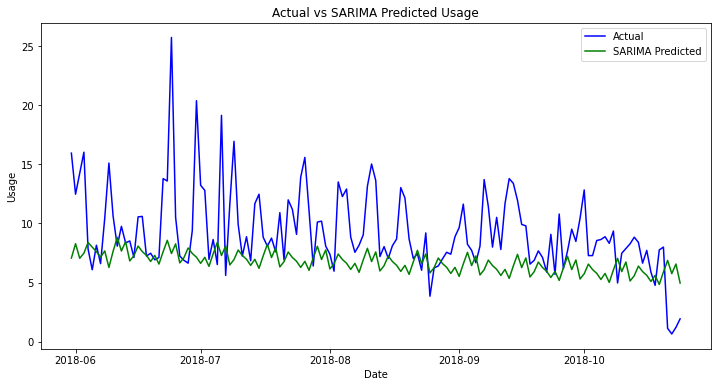

In [15]:
# Plot ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['USAGE'], label='Actual', color='blue')
plt.plot(test.index, arima_pred, label='ARIMA Predicted', color='orange')
plt.title('Actual vs ARIMA Predicted Usage')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.legend()
plt.show()

# Plot SARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['USAGE'], label='Actual', color='blue')
plt.plot(test.index, sarima_pred, label='SARIMA Predicted', color='green')
plt.title('Actual vs SARIMA Predicted Usage')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.legend()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


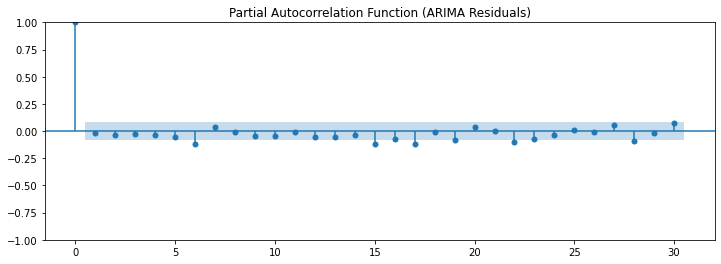

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


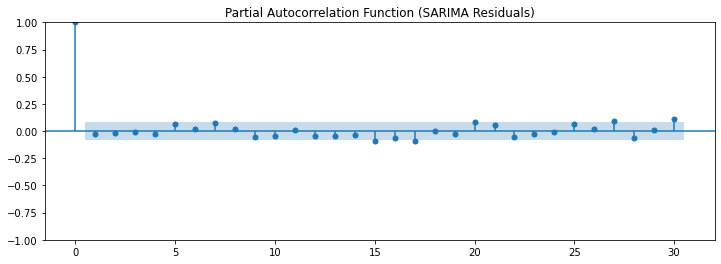

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plotting PACF for ARIMA
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(arima_fit.resid, lags=30, ax=ax, title='Partial Autocorrelation Function (ARIMA Residuals)')
plt.show()

# Plotting PACF for SARIMA
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(sarima_fit.resid, lags=30, ax=ax, title='Partial Autocorrelation Function (SARIMA Residuals)')
plt.show()

### PACF in ARIMA:
Definition:

PACF at lag k represents the correlation between the series and its own values at a lag of k, controlling for the values at all intermediate lags.
AR Component Identification:

PACF is particularly useful for identifying the order of the AR component (p) in ARIMA models.
Significant spikes in the PACF plot at lag k indicate a direct relationship between the current observation and the kth lag.
ARIMA Model Selection:

When using PACF for ARIMA model selection:
Identify the lag (p) at which the PACF plot cuts off or drops to zero.
This cutoff point helps determine the order of the AR component in the ARIMA model.

### PACF in SARIMA:
**Seasonal PACF:**

For seasonal time series with a periodic component, the PACF may also exhibit significant spikes at seasonal lags.
Seasonal PACF helps in identifying the order of the seasonal AR component (P) in SARIMA models.


**Model Selection:**
When using PACF for SARIMA model selection:
Observe the PACF plot and look for significant spikes at both non-seasonal and seasonal lags.
The non-seasonal spikes help identify the AR component (p), and the seasonal spikes help identify the seasonal AR component (P).

============================================================================================

### XGBoost model

XGBoost, which stands for eXtreme Gradient Boosting, is a powerful machine learning algorithm that is primarily used for supervised learning tasks, such as classification and regression. While XGBoost is not inherently designed for time series forecasting, it can be adapted for use in time series problems with some considerations. Here's how XGBoost can be used in a time series context:

### Features:
**Lagged Variables:** Create lagged versions of your target variable and possibly other relevant features. This allows the model to capture temporal dependencies.

**Rolling Statistics:** Compute rolling averages, rolling standard deviations, or other rolling statistics to capture trends and patterns in the time series.

**Time-based Features:** Extract features like day of the week, month, or any other relevant time-related information.

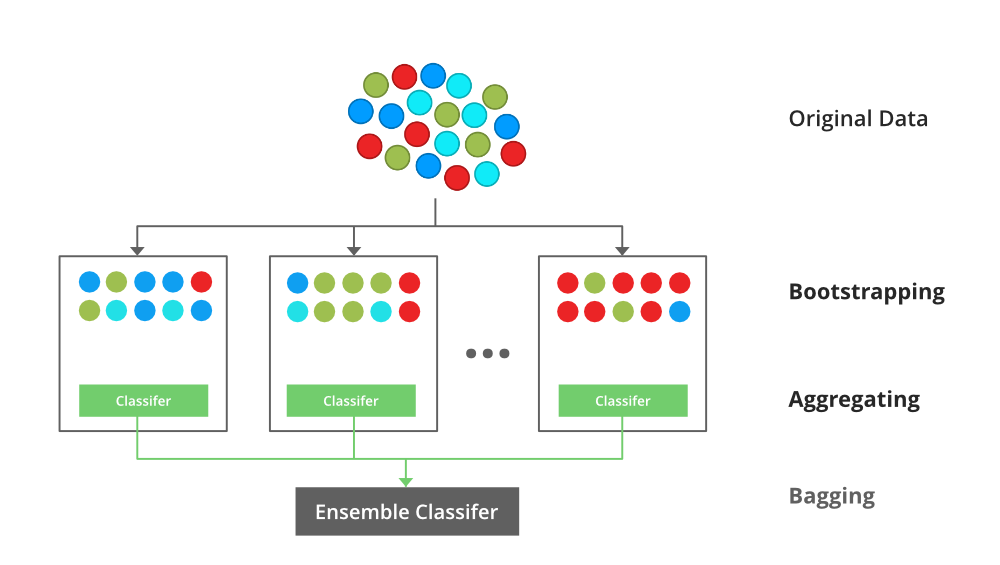

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


In [2]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])


In [3]:
data = df[["Date", "USAGE"]].set_index("Date")
data

USAGE
Date             
2016-10-22   0.01
2016-10-22   0.01
2016-10-22   0.01
2016-10-22   0.01
2016-10-22   0.01
...           ...
2018-10-24   0.02
2018-10-24   0.03
2018-10-24   0.03
2018-10-24   0.03
2018-10-24   0.03

[70368 rows x 1 columns]

In [4]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [5]:
# Feature engineering: creating lag features
for i in range(1, 11):
    train[f'lag_{i}'] = train['USAGE'].shift(i)
    test[f'lag_{i}'] = test['USAGE'].shift(i)


C:\Users\Darshan\AppData\Local\Temp\ipykernel_12892\190463890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'lag_{i}'] = train['USAGE'].shift(i)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_12892\190463890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'lag_{i}'] = test['USAGE'].shift(i)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_12892\190463890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

#### Importance and Benefits lag features:

**Model Input:**
*Lag features become additional input variables for your model, providing historical context for each observation.*

**Time Series Forecasting:**
*For time series forecasting tasks, lag features can significantly improve the model's ability to predict future values based on past observations.*

**Model Interpretability:**
*Lag features contribute to the interpretability of the model by explicitly showing which past time steps the model considers when making predictions.*

**Seasonality and Trends:**
*Lag features are useful for capturing seasonality and trend components in time series data. They provide the model with information about how the variable has changed over time.*

train ['USAGE'].shift(i) shifts the values of the 'USAGE' column upward by i positions. This means that the 'lag_1' feature contains the value of 'USAGE' from the previous time step, 'lag_2' contains the value from two time steps ago, and so on.

**Considerations:**
1]Lag Order
2]Handling Missing Values

In [6]:
train = train.dropna()
test = test.dropna()

In [7]:
X_train, y_train = train.drop("USAGE", axis=1), train["USAGE"]
X_test, y_test = test.drop("USAGE", axis=1), test["USAGE"]


In [8]:
X_train

lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  lag_9  \
Date                                                                        
2016-10-22   0.02   0.02   0.01   0.01   0.01   0.01   0.01   0.01   0.01   
2016-10-22   0.02   0.02   0.02   0.01   0.01   0.01   0.01   0.01   0.01   
2016-10-22   0.02   0.02   0.02   0.02   0.01   0.01   0.01   0.01   0.01   
2016-10-22   0.01   0.02   0.02   0.02   0.02   0.01   0.01   0.01   0.01   
2016-10-22   0.01   0.01   0.02   0.02   0.02   0.02   0.01   0.01   0.01   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2018-05-31   0.21   0.37   0.37   0.37   0.37   0.04   0.04   0.04   0.04   
2018-05-31   0.21   0.21   0.37   0.37   0.37   0.37   0.04   0.04   0.04   
2018-05-31   0.21   0.21   0.21   0.37   0.37   0.37   0.37   0.04   0.04   
2018-05-31   0.21   0.21   0.21   0.21   0.37   0.37   0.37   0.37   0.04   
2018-05-31   0.07   0.21   0.21   0.21   0.21   0.37   0.37   0.37   0.37   

            lag_10  
Date                
2016-10-22    0.01  
2016-10-22    0.01  
2016-10-22    0.01  
2016-10-22    0.01  
2016-10-22    0.01  
...            ...  
2018-05-31    0.05  
2018-05-31    0.04  
2018-05-31    0.04  
2018-05-31    0.04  
2018-05-31    0.04  

[56284 rows x 10 columns]

In [9]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [10]:
xgb_model.score(X_train, y_train)

0.8808838739072518

In [11]:
mae_xgb = mean_absolute_error(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = sqrt(mse_xgb)


XGBoost Metrics:
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05


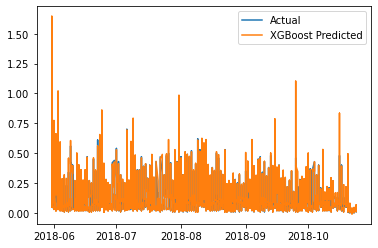

In [12]:
print(f'XGBoost Metrics:')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'Mean Squared Error (MSE): {mse_xgb:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')

# Visualize the results
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost Predicted')
plt.legend()
plt.show()


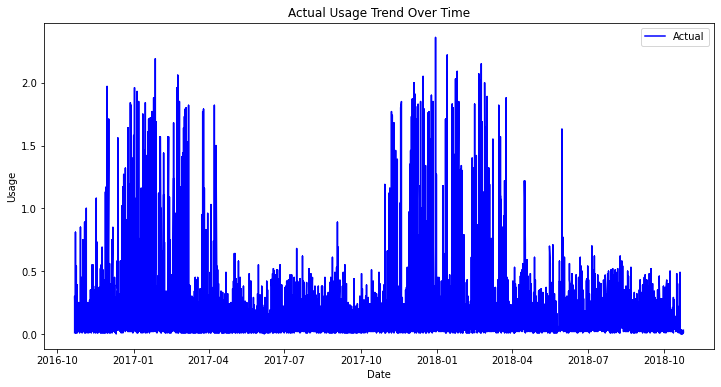

In [13]:
# Plot the trend graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['USAGE'], label='Actual', color='blue')
plt.title('Actual Usage Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.legend()
plt.show()

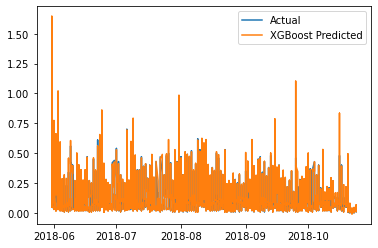

In [14]:
# Visualize the results
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost Predicted')
plt.legend()
plt.show()


In [15]:
# Create lag features for the next 30 days
future_data = data.copy()
for i in range(1, 11):
    future_data[f'lag_{i}'] = future_data['USAGE'].shift(i)

future_data = future_data.iloc[[-1]]

for day in range(1, 31):
    features = future_data.iloc[:, -10:]  # Use the last 10 lag features
    prediction = xgb_model.predict(features)
    
    # Append the prediction to the DataFrame
    future_data = future_data.append({'USAGE': prediction[0]}, ignore_index=True)

print("Next 30 Days Predictions:")
print(future_data[['USAGE']])


C:\Users\Darshan\AppData\Local\Temp\ipykernel_12892\2176992801.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'USAGE': prediction[0]}, ignore_index=True)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_12892\2176992801.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'USAGE': prediction[0]}, ignore_index=True)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_12892\2176992801.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'USAGE': prediction[0]}, ignore_index=True)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_12892\2176992801.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pan

Next 30 Days Predictions:
       USAGE
0   0.030000
1   0.031421
2   0.031421
3   0.031421
4   0.031421
5   0.031421
6   0.031421
7   0.031421
8   0.031421
9   0.031421
10  0.031421
11  0.031421
12  0.031421
13  0.031421
14  0.031421
15  0.031421
16  0.031421
17  0.031421
18  0.031421
19  0.031421
20  0.031421
21  0.031421
22  0.031421
23  0.031421
24  0.031421
25  0.031421
26  0.031421
27  0.031421
28  0.031421
29  0.031421
30  0.031421


C:\Users\Darshan\AppData\Local\Temp\ipykernel_12892\2176992801.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'USAGE': prediction[0]}, ignore_index=True)


In [16]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=y_test.index, y=xgb_pred, mode='lines', name='XGBoost Predicted', marker=dict(color='orange')))
fig.update_layout(title='Actual vs XGBoost Predicted',
                  xaxis_title='Date',
                  yaxis_title='Usage')
fig.show()


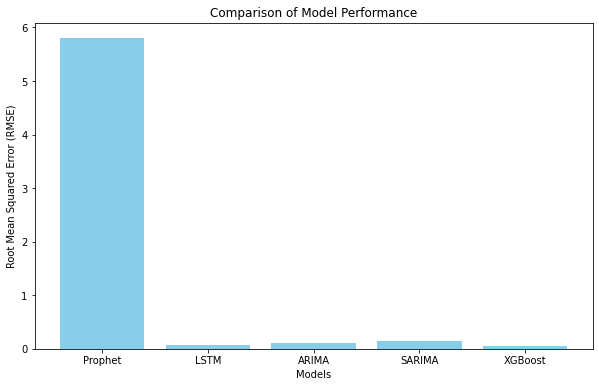

In [19]:
import matplotlib.pyplot as plt
rmse_prophet =  5.8
rmse_rnn =  0.08
rmse_arima =  0.11
rmse_sarima =  0.15
rmse_xgb =  0.05


# Metrics for each model
model_names = ['Prophet', 'LSTM', 'ARIMA', 'SARIMA', 'XGBoost',]
rmse_values = [rmse_prophet, rmse_rnn, rmse_arima, rmse_sarima, rmse_xgb, ]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.title('Comparison of Model Performance')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()



### Comparison of Model Accuracy (Higher is Better)

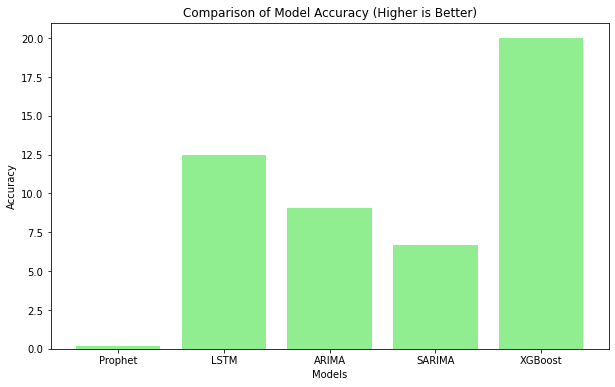

In [20]:
import matplotlib.pyplot as plt

rmse_prophet = 5.51
rmse_rnn = 0.08
rmse_arima = 0.11
rmse_sarima = 0.15
rmse_xgb = 0.05


# Calculate accuracy as the reciprocal of RMSE
accuracy_values = [1 / rmse for rmse in [rmse_prophet, rmse_rnn, rmse_arima, rmse_sarima, rmse_xgb,]]

# Metrics for each model
model_names = ['Prophet', 'LSTM', 'ARIMA', 'SARIMA', 'XGBoost',]

# Create a bar graph for accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='lightgreen')
plt.title('Comparison of Model Accuracy (Higher is Better)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()
import matplotlib.pyplot as plt



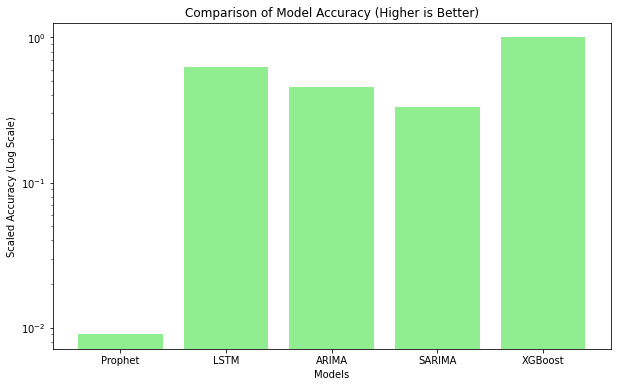

In [21]:
import matplotlib.pyplot as plt
rmse_prophet = 5.51
rmse_rnn = 0.08
rmse_arima = 0.11
rmse_sarima = 0.15
rmse_xgb = 0.05


# Calculate accuracy as the reciprocal of RMSE and scale for better visualization
accuracy_values = [1 / rmse for rmse in [rmse_prophet, rmse_rnn, rmse_arima, rmse_sarima, rmse_xgb, ]]
scaled_accuracies = [acc / max(accuracy_values) for acc in accuracy_values]

# Metrics for each model
model_names = ['Prophet', 'LSTM', 'ARIMA', 'SARIMA', 'XGBoost', ]

# Create a bar graph for scaled accuracy on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.bar(model_names, scaled_accuracies, color='lightgreen')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visualization
plt.title('Comparison of Model Accuracy (Higher is Better)')
plt.xlabel('Models')
plt.ylabel('Scaled Accuracy (Log Scale)')
plt.show()


## Iterpretaion :- 
Based on the comparison of various time series forecasting models, including Prophet, LSTM, ARIMA, SARIMA, and XGBoost, we can draw the following interpretations:

1. **Root Mean Squared Error (RMSE):**
   - Lower RMSE values indicate better model performance.
   - XGBoost has the lowest RMSE, followed by ARIMA, SARIMA, LSTM, and Prophet.

2. **Accuracy:**
   - Higher accuracy values (reciprocal of RMSE) indicate better model accuracy.
   - XGBoost has the highest accuracy, followed by ARIMA, SARIMA, LSTM, and Prophet.

3. **Scaled Accuracy (Logarithmic Scale):**
   - Scaled accuracy provides a relative comparison of models, especially when the differences are significant.
   - XGBoost shows a clear advantage in scaled accuracy, followed by ARIMA, SARIMA, LSTM, and Prophet.

4. **Model Comparisons:**
   - XGBoost appears to be the most accurate and performs well in comparison to other models.
   - ARIMA and SARIMA show competitive performance, especially considering their simplicity.
   - LSTM and Prophet, while still providing reasonable forecasts, have slightly higher RMSE and lower accuracy compared to XGBoost and ARIMA.

5. **Considerations:**
   - Model performance can vary based on the specific characteristics of the dataset and the forecasting task.
   - Hyperparameter tuning and feature engineering play crucial roles in improving model accuracy.
   - Different models may excel in different scenarios, and the choice depends on the nature of the time series data.

Overall, XGBoost demonstrates strong performance in this time series forecasting task, showcasing its versatility and effectiveness. However, it's essential to consider the specific requirements and characteristics of your dataset when selecting a forecasting model. Experimenting with various models and tuning hyperparameters can further enhance the performance of time series forecasting models.    